<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regressão-Linear-Univariável" data-toc-modified-id="Regressão-Linear-Univariável-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Linear Univariável</a></span><ul class="toc-item"><li><span><a href="#Entendimento-do-Problema" data-toc-modified-id="Entendimento-do-Problema-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Entendimento do Problema</a></span></li><li><span><a href="#Lendo-e-Explorando-Dataset" data-toc-modified-id="Lendo-e-Explorando-Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lendo e Explorando Dataset</a></span></li><li><span><a href="#Visualizando-os-Dados" data-toc-modified-id="Visualizando-os-Dados-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizando os Dados</a></span></li><li><span><a href="#Implementando-Algoritmo" data-toc-modified-id="Implementando-Algoritmo-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Implementando Algoritmo</a></span><ul class="toc-item"><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Hypothesis</a></span></li><li><span><a href="#Função-Custo" data-toc-modified-id="Função-Custo-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Função Custo</a></span></li><li><span><a href="#Gradiente-Descendente" data-toc-modified-id="Gradiente-Descendente-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Gradiente Descendente</a></span></li></ul></li></ul></li><li><span><a href="#Regressão-Linear-Multivariável" data-toc-modified-id="Regressão-Linear-Multivariável-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regressão Linear Multivariável</a></span><ul class="toc-item"><li><span><a href="#Entendendo-o-Problema" data-toc-modified-id="Entendendo-o-Problema-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Entendendo o Problema</a></span><ul class="toc-item"><li><span><a href="#Lendo-e-Explorando-Dataset" data-toc-modified-id="Lendo-e-Explorando-Dataset-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Lendo e Explorando Dataset</a></span></li></ul></li></ul></li></ul></div>

Notebook criado para implementação do ```exercício 1``` do curso de Aprendizagem Automática da Universidade de Stanford. 

Em uma primeira etapa, tema proposto envolve a aplicação de um problema de Regressão Linear de uma variável para previsão de lucro de um estabelecimento levando em consideração a população do munícipio onde o mesmo se encontra.

Posteriormente, é proposto um problema de Regressão Linear com múltiplas variáveis para previsão de preços de casas.

    - Em ambos, a filosofia adotada será:
        - Desenvolvimenteo da solução através de Álgebra Linear (arrays do NumPy)
        - Desenvolvimento da solução através dos pacotes do scikit-learn

## Regressão Linear Univariável

### Entendimento do Problema

No arquivo pdf disponibilizado na sessão de downloads do curso, o problema é descrito da seguinte maneira:

Nesta parte do exercício, você implementará Regressão Linear com uma variável para predizer o ```lucro``` de um estabelecimento Food Truck. Suponha que você seja o CEO de uma franquia de restaurantes e está considerando diferentes cidades para a abertura de um novo estabelecimento. A franquia já possui restaurantes em diversas cidades e você tem em mãos os dados que relacionam o lucro e a ```população``` dessas cidades.

Sua ideia é utilizar estes dados para escolher a melhor cidade para expansão do negócio. O arquivo ```ex1data1.txt``` contém o dataset para implementação da Regressão Linear. A primeira coluna refere-se a população da cidade, sendo a segunda coluna responsável por mostrar o lucro do Food Truck naquela cidade. Um valor negativo de lucro indica, na verdade, perda.

### Lendo e Explorando Dataset

Para ler o arquivo, vamos utilizar algumas funcionalidades do ```NumPy```

In [1]:
# Importando biblioteca e lendo arquivo
import numpy as np

dataset = np.loadtxt('ex1data1.txt', delimiter=',')

Fonte: [numpy.loadtxt](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.loadtxt.html)

In [2]:
# Verificando primeiras linhas
dataset[:5]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

In [3]:
# Tipo primitivo
dataset.dtype

dtype('float64')

In [4]:
# Dimensões do dataset
dataset.shape

(97, 2)

In [5]:
# Comunicando
print(f'O dataset possui {dataset.shape[0]} linhas e {dataset.shape[1]} colunas.')

O dataset possui 97 linhas e 2 colunas.


In [6]:
# Separando dataset
population = dataset[:, 0]
profit = dataset[:, 1]

In [7]:
# Verificando
print(f'População: {population[:5]}')
print(f'Lucro: {profit[:5]}')
print(f'\nOriginal: \n{dataset[:5]}')

População: [6.1101 5.5277 8.5186 7.0032 5.8598]
Lucro: [17.592   9.1302 13.662  11.854   6.8233]

Original: 
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


### Visualizando os Dados

Para esta importante funcionalidade, vamos utilizar a biblioteca ```matplotlib``` para relacionar os dados já explorados previamente.

In [8]:
# Importando biblioteca
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Ajuda sobre plot de dispersão
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`.
    
    Marker size is scaled by `s` and marker color is mapped to `c`.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an arra

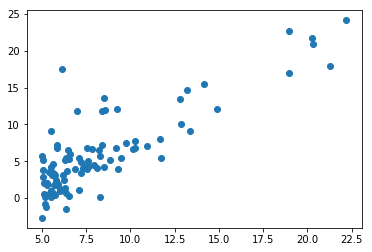

In [10]:
# Plotando gráfico de dispersão
plt.scatter(population, profit)

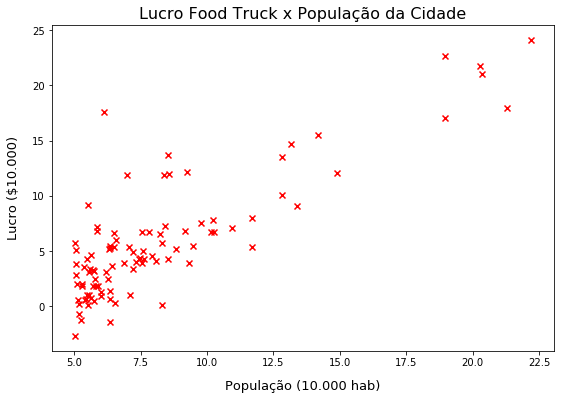

In [11]:
# Aprimorando plot
fig = plt.figure(figsize=(9, 6))
plt.scatter(population, profit, c='r', marker='x')
plt.title('Lucro Food Truck x População da Cidade', size=16)
plt.xlabel('População (10.000 hab)', size=13, labelpad=12)
plt.ylabel('Lucro ($10.000)', size=13, labelpad=12)
plt.show()

### Implementando Algoritmo

Após visualizar e entender os dados, vamos implementar o modelo de Regressão Linear

#### Hypothesis

A literatura diz que a definição da função hypothesis para um modelo de Regressão Linear é dada por:

\begin{equation*}
h_\theta(x) = \theta^Tx=\theta_0 + \theta_1x_1
\end{equation*}

Lembrando também que a Função Custo e a implementação do Gradiente Descendente são dadas por:

\begin{equation*}
J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
\end{equation*}

\begin{equation*}
    \theta_j:= \theta_j-\alpha\frac{\partial}{\partial \theta_j}J(\theta) 
             = \theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
\end{equation*}

Para considerar o termo enviesado da feature ```X```, vamos adicionar uma coluna de 1s no array de população.

In [12]:
# Adicionando bias
bias = np.ones(population.shape[0])
X = np.column_stack((bias, population))
# X = np.c_[np.ones((m, 1)), X]

# Nomenclatura y
y = profit[:]

# Verificando
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

Fontes:

[np.ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

[stackOverflow-np.column_stack()](https://stackoverflow.com/questions/21852892/use-numpy-to-join-two-columns)

Ainda não temos os parâmetros ```theta``` para calcular nossa fução hypothesis e, portanto, vamos considerar um ```theta_inicial``` como sendo:
    - theta_0 = 0
    - theta_1 = 1
    
A partir disso, podemos calcular a Função Custo e o Gradiente visando encontrar os melhores parâmetros.

In [13]:
# Inicializando parâmetros
theta_inicial = np.zeros((2, 1))
theta_inicial

array([[0.],
       [0.]])

Fonte: [np.zeros()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)

In [14]:
# Verificando dimensões
print(f'Dimensões theta_inicial: {theta_inicial.shape}')
print(f'Dimensões X: {X.shape}')

Dimensões theta_inicial: (2, 1)
Dimensões X: (97, 2)


Antes de calcular a função hypothesis, é preciso aplicar uma transposição na matriz de parâmetros. 

Fonte: [np.transpose()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html), [np.ndarray.T](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)

In [15]:
# Calculando hypothesis
h = X.dot(theta_inicial)
h

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

Fonte: [np.ndarray.dot(matrix)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.dot.html)

Exatamente o que se esperava: um vetor de predições repleto por zeros. Isto pois iniciamos nossos parâmetros com (0, 0). Vamos calcular o custo.

In [16]:
# Implementando função
def hypothesis(X, theta):
    """
    Função responsável por calcular o vetor h em um problema de Regressão Linear
    INPUT:
        X: matriz contendo features do dataset
        theta: matriz de parâmetros
    OUTPUT:
        h: matriz de hypothesis contendo predições do modelo
    """
    return X.dot(theta)

#### Função Custo

\begin{equation*}
J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
\end{equation*}

In [17]:
# Calculando custo
m = X.shape[0]

# Testando predições - label
h - y

array([[-17.592  ,  -9.1302 , -13.662  , ...,  -0.14454,  -9.0551 ,
         -0.61705],
       [-17.592  ,  -9.1302 , -13.662  , ...,  -0.14454,  -9.0551 ,
         -0.61705],
       [-17.592  ,  -9.1302 , -13.662  , ...,  -0.14454,  -9.0551 ,
         -0.61705],
       ...,
       [-17.592  ,  -9.1302 , -13.662  , ...,  -0.14454,  -9.0551 ,
         -0.61705],
       [-17.592  ,  -9.1302 , -13.662  , ...,  -0.14454,  -9.0551 ,
         -0.61705],
       [-17.592  ,  -9.1302 , -13.662  , ...,  -0.14454,  -9.0551 ,
         -0.61705]])

In [18]:
# Testando soma
sum(h - y)

array([-1706.424  ,  -885.6294 , -1325.214  , -1149.838  ,  -661.8601 ,
       -1152.942  ,  -421.7851 , -1164.     ,  -640.0739 ,  -370.2102 ,
        -315.4634 , -1503.985  ,  -306.0447 ,  -700.9026 ,   -69.46946,
        -340.7513 ,  -514.5656 ,   -54.39469,  -354.2246 ,  -522.7621 ,
        -304.4442 , -2111.399  ,  -413.511  ,  -503.1875 ,  -299.0025 ,
       -2195.886  , -1309.597  ,  -683.5299 , -1425.124  , -2342.259  ,
         118.34   ,  -581.6702 , -1176.998  ,  -179.4015 ,  -634.6322 ,
        -442.5431 ,  -399.2908 ,  -329.1016 ,  -981.349  ,  -533.2478 ,
         -53.98729,  -379.4155 ,  -522.3838 ,  -236.7382 ,  -652.9846 ,
        -101.4911 ,  -497.9689 ,  -178.868  ,  -776.4171 ,   -98.7363 ,
        -654.7888 ,  -178.4412 ,  -415.9845 ,  -484.8157 ,  -138.0601 ,
         137.8467 ,  -240.1332 ,  -446.6074 ,  -384.3528 ,  -525.1677 ,
        -501.4318 ,    72.05063, -1739.113  , -1169.238  , -1654.238  ,
        -473.8644 ,  -557.1874 ,  -754.2138 ,   -98.6781 , -2036

Algo está errado. O esperado seria um valor único. Vamos investigar.

In [19]:
# Dimensões de cada um dos vetores
print(f'Dimensão de h: {h.shape}')
print(f'Dimensão de y: {y.shape}')

Dimensão de h: (97, 1)
Dimensão de y: (97,)


Aparentemente, a dimensão de ```y``` está influenciando na subtração entre os vetores. Aplicando alterações

In [20]:
# Modificando dimensão
y = y.reshape(m, 1)
y.shape

(97, 1)

In [21]:
# Testando mais uma vez
sum(h - y)

array([-566.3961])

Faltou elevar ao quadrado...

In [22]:
# Corrigindo
sum((h - y) ** 2)

array([6222.11037223])

In [23]:
# Uma outra forma
e = (h - y)
e.T.dot(e)

array([[6222.11037223]])

In [24]:
# Dividindo por 2m
sum((h - y) ** 2) / (2*m)

array([32.07273388])

In [25]:
# Definindo função para cálculo do custo
def costFunction(X, y, theta):
    """
    Função responsável por calcular o custo da função de acordo com os parâmetros empregados
    INPUT:
        X: matriz de features;
        y: labels;
        theta: parâmetros do modelo
    OUTPUT:
        J: função custo
    """
    # Aplicando termo x0 no dataset
    m = X.shape[0]
    
    # Computando hypothesis
    h = hypothesis(X, theta)
    
    # Calculando custo
    squared_error = (h - y) ** 2
    return sum(squared_error / (2*m))

In [26]:
# Verificando
initial_theta = np.zeros((2, 1))
J = costFunction(X, y, initial_theta)
print(f'Função custo para theta inicial = (0, 0): {J[0]:.2f}')

Função custo para theta inicial = (0, 0): 32.07


#### Gradiente Descendente

Após a implementação da Função Custo, vamos implementar as derivadas parciais para o cálculo do gradiente. O objetivo é encontrar o melhor set de parâmetros ```theta``` para o problema em questão.

\begin{equation*}
    \theta_j:= \theta_j-\alpha\frac{\partial}{\partial \theta_j}J(\theta) 
             = \theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
\end{equation*}

In [144]:
# Inicializando parâmetros
[m, n] = X.shape
iterations = 1500
alpha = 0.01
theta = np.zeros((n, 1))
temp = theta

In [145]:
# Testando uma única iteração
h = hypothesis(X, theta)
temp[0] = temp[0] - (alpha/m) * sum(h - y)
temp[1] = temp[1] - (alpha/m) * X[:, 1].dot((h-y))
theta = temp[:]
theta

array([[0.05839135],
       [0.6532885 ]])

In [146]:
# Implementando gradiente
J_history = np.zeros((iterations, 1))
for i in range(iterations):
    h = hypothesis(X, theta) 
    temp[0] = temp[0] - (alpha/m) * sum(h - y)
    temp[1] = temp[1] - (alpha/m) * X[:, 1].dot((h-y))
    theta = temp[:]
    J_history[i] = costFunction(X, y, theta)

In [148]:
# Verificando melhores parâmetros
theta

array([[-3.63077001],
       [ 1.16641043]])

In [153]:
# Menor custo encontrado
J = costFunction(X, y, theta)
J

array([4.48336514])

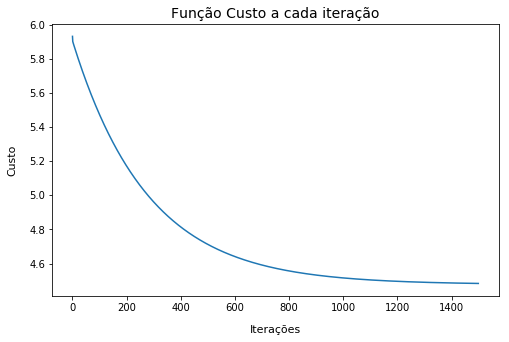

In [157]:
# Visualizando função custo
axis = np.arange(iterations)
fig = plt.figure(figsize=(8, 5))
plt.plot(axis, J_history)
plt.title('Função Custo a cada iteração', size=14)
plt.xlabel('Iterações', size=11, labelpad=12)
plt.ylabel('Custo', size=11, labelpad=12)
plt.show()

O problema de Regressão Linear foi implementado com sucesso através da aplicação de Álgebra Linear e das facilidades de bibliotecas como NumPy

In [158]:
# Calculando predições
predictions = hypothesis(X, theta)

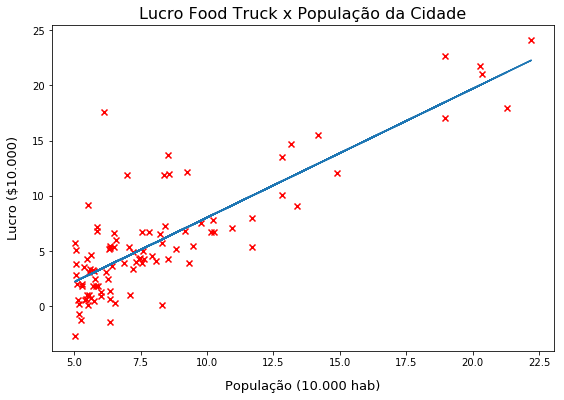

In [159]:
# Aprimorando plot
fig = plt.figure(figsize=(9, 6))
plt.scatter(population, profit, c='r', marker='x')
plt.title('Lucro Food Truck x População da Cidade', size=16)
plt.xlabel('População (10.000 hab)', size=13, labelpad=12)
plt.ylabel('Lucro ($10.000)', size=13, labelpad=12)
plt.plot(population, predictions)
plt.show()

## Regressão Linear Multivariável

### Entendendo o Problema

Nesta parte opcional do exercício, iremos implementar Regressão Linear com múltiplas variáveis para predição de preços de casas. Suponha que você esteja vendendo sua casa e queira saber um preço razoável de mercado para anunciá-la. Uma boa maneira de descobrir é coletando informações de casas ```vendidas recentemente``` e aplicar um modelo de predição de preços.

O dataset a ser utilizado contém dados sobre o preço de casas em Portland, Oregon. As colunas são, respectivamente:
        - Tamanho da casa (em pés quadrados);
        - Número de quartos
        - Preço

#### Lendo e Explorando Dataset

In [163]:
# Importando biblioteca e lendo arquivo
import numpy as np

dataset = np.loadtxt('ex1data2.txt', delimiter=',')
dataset[:5]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

Observando os dados, é possível identificar uma questão que precisa ser tratada

In [166]:
# Observando
size_sample = dataset[0][0]
bedrooms_sample = dataset[0][1]

print(f'Exemplo de tamanho de casa: {size_sample}')
print(f'Exemplo de número de quartos: {bedrooms_sample}')

Exemplo de tamanho de casa: 2104.0
Exemplo de número de quartos: 3.0


A diferença é discrepância. Será necessário realizar um procedimento conhecido como ```Feature Normalization```.